In [1]:
#범주형 변수(male(0)/female(1), 10대(0)/20대(1).../80대(7), A/B/C/D/F) -> 
#이항 변수화(성별: 0 => 10, 1 => 01)
#(연령대: 10대(0) => 10000000, 20대(1) => 01000000,....)

#이항변수화:OneHotEncoder()

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
# [성별(1/0), 연령대(0/1/2), 성적(0/1/2/3/4)]
data=np.array([[0,1,1], #여성,30대,B학점
               [0,2,2], #여성,40대,C학점
               [1,0,3], #남성,20대,D학점
               [1,1,4], #남성,30대,F학점
               [0,0,0]  #여성,20대,A학점
              ])
data

array([[0, 1, 1],
       [0, 2, 2],
       [1, 0, 3],
       [1, 1, 4],
       [0, 0, 0]])

In [13]:
ohe=OneHotEncoder()
ohe.fit(data) #data 변수에 저장된 데이터에 맞추어(fit)서
#이항변수화 시킴

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [16]:
ohe.active_features_
# array([0, 1,  2,   3,   4,  5, 6, 7, 8, 9]
#       [남,여,20대,30대,40대,A,B,C,D,F]
#[성별(1/0), 연령대(0/1/2), 성적(0/1/2/3/4)]
ohe.n_values_ # array([2, 3, 5]) 각 피쳐별 범주의 개수
ohe.feature_indices_ #array([ 0,  2,  5, 10], dtype=int32)
#0,2 : 0이상 2미만, 2,5:2이상 5미만, 5,10:5이상 10미만

array([ 0,  2,  5, 10], dtype=int32)

In [18]:
# 예) 여성, 30대, D학점(0, 1, 3)
#=>0 -> 10, 1 -> 010, D -> 00010
test=np.array([[0,1,3]])
ohe.transform(test).toarray()
#1)연습문제 : 타이타닉 데이터셋을 이용하여 연습(원핫인코딩)

array([[1., 0., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [ ]:
#np.digitize(), np.where() : 연속형 변수 -> 이산형화(2개 이상)

In [19]:
from pandas import DataFrame
np.random.seed(75)
df=DataFrame({
    'd1':np.random.randn(10),
    'd2':['x','x','x','x','x','y','y','y','y','y']
})
df

,d1,d2
0,-0.709502,x
1,0.112694,x
2,0.477022,x
3,1.935981,x
4,0.450415,x
5,-1.188847,y
6,0.613631,y
7,-0.178142,y
8,1.346521,y
9,1.161150,y


In [28]:
bins=np.linspace(df.d1.min(), df.d1.max(), 5) #df['d1'].min()
#df['d1_bin']=np.linspace()
bins

array([-1.18884736, -0.40764024,  0.37356688,  1.154774  ,  1.93598112])

In [32]:
df['d1_bin']=np.digitize(df['d1'], bins)
df

,d1,d2,d1_bin
0,-0.709502,x,1
1,0.112694,x,2
2,0.477022,x,3
3,1.935981,x,5
4,0.450415,x,3
5,-1.188847,y,1
6,0.613631,y,3
7,-0.178142,y,2
8,1.346521,y,4
9,1.161150,y,4


In [31]:
df['d1']

0   -0.709502
1    0.112694
2    0.477022
3    1.935981
4    0.450415
5   -1.188847
6    0.613631
7   -0.178142
8    1.346521
9    1.161150
Name: d1, dtype: float64

In [38]:
df.groupby('d1_bin')['d1'].size()
df.groupby('d1_bin')['d1'].mean()
df.groupby('d1_bin')['d1'].sum()
df.groupby('d1_bin')['d1'].std()
#다양한 함수를 그룹단위로 적용하면 됨

d1_bin
1    0.338948
2    0.205652
3    0.087568
4    0.131077
5         NaN
Name: d1, dtype: float64

In [44]:
df.groupby('d1_bin')['d2'].value_counts()

df2=df[df['d1_bin']==3]

,d1,d2,d1_bin
2,0.477022,x,3
4,0.450415,x,3
6,0.613631,y,3


In [45]:
#np.where(조건식, 참, 거짓)
#np.where(조건식, 참, np.where(조건식, 참, 거짓))
#...

In [50]:
df['d1']
df['d1'].mean()
df['hl']=np.where(df['d1']>=df['d1'].mean(),'high','low')
df

,d1,d2,d1_bin,hl
0,-0.709502,x,1,low
1,0.112694,x,2,low
2,0.477022,x,3,high
3,1.935981,x,5,high
4,0.450415,x,3,high
5,-1.188847,y,1,low
6,0.613631,y,3,high
7,-0.178142,y,2,low
8,1.346521,y,4,high
9,1.161150,y,4,high


In [53]:
df.groupby('hl')['d1'].size()
df.groupby('hl')['d1'].mean()
df.groupby('hl')['d1'].std()

hl
high    0.591084
low     0.576501
Name: d1, dtype: float64

In [59]:
Q1=np.percentile(df['d1'],25) #25%지점
Q3=np.percentile(df['d1'],75) #75%지점
Q3
#np.where()를 사용, Q3보다 크거나 같은=>high,
#Q1보다 크거나 같은=>medium, 나머지는 => low

df['hml']=np.where(df['d1']>=Q3, 'high',
         np.where(df['d1']>=Q1,'medium', 'low'))

In [61]:
data=np.arange(6).reshape(3,2)

In [67]:
data
#data를 2차항 변수화
#x1,x2 => 1, x1, x2, x1^2, x1*x2, x2^2

#        x1,x2
#array([[0, 1],  => 1, 0, 1, 0, 0, 1
#       [2, 3],  => 1, 2, 3, 4, 6, 9
#       [4, 5]]) => 1, 4, 5, 16, 20, 25
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
poly.fit_transform(data)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [74]:
#데이터 -> 재구조화(피봇테이블,stack/unstack,크로스테이블,melt,widetolong)
df=DataFrame({
  'c_id':['c1','c1','c1','c2','c2','c2','c3','c3','c3'],
    'p_id':['p1','p2','p3','p1','p2','p3','p1','p2','p3'],
    'amount':[20,10,0,30,20,30,0,5,10],
    'reg':['S','S','S','S','S','S','A','A','A']
})
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
c_id      9 non-null object
p_id      9 non-null object
amount    9 non-null int64
reg       9 non-null object
dtypes: int64(1), object(3)
memory usage: 368.0+ bytes


In [75]:
df

,c_id,p_id,amount,reg
0,c1,p1,20,S
1,c1,p2,10,S
2,c1,p3,0,S
3,c2,p1,30,S
4,c2,p2,20,S
5,c2,p3,30,S
6,c3,p1,0,A
7,c3,p2,5,A
8,c3,p3,10,A


In [76]:
#pivot함수 버전
df.pivot(index='c_id', columns='p_id', values='amount')

p_id,p1,p2,p3
c_id,,,
c1,20,10,0
c2,30,20,30
c3,0,5,10


In [77]:
#pivot_table함수 버전

df.pivot_table(index='c_id', columns='p_id', values='amount')

p_id,p1,p2,p3
c_id,,,
c1,20,10,0
c2,30,20,30
c3,0,5,10


In [78]:
#피봇과 피봇테이블 함수의 차이(둘 이상의 변수로 index를 삼고자 하는 경우)
#에러발생=> df.pivot(index=['sido','dong'], columns='p_id', values='amount')
#잘 됨=> df.pivot_table(index=['sido','dong'], columns='p_id', values='amount')

#집계함수(그룹단위 sum, mean 등 함수)사용 가능 여부에 따라
#pivot함수(사용 불가), pivot_table(사용 가능)
#df.pivot_table(index=['sido','dong'], columns='p_id', values='amount', aggfunc=np.sum)





In [80]:
#df.pivot(index=['c_id', 'reg'], columns='p_id', values='amount') 에러 발생
df.pivot_table(index=['c_id', 'reg'], columns='p_id', values='amount')

,p_id,p1,p2,p3
c_id,reg,,,
c1,S,20,10,0
c2,S,30,20,30
c3,A,0,5,10


In [85]:
# #df.pivot(index=['reg'], columns='p_id', values='amount')
# df.pivot_table(index=['reg'], columns='p_id', values='amount') #default로 mean함수 적용
# df.pivot_table(index=['reg'], columns='p_id', values='amount', aggfunc=np.mean) 

df.pivot_table(index=['reg'], columns='p_id', values='amount', aggfunc=np.sum) 

p_id,p1,p2,p3
reg,,,
A,0,5,10
S,50,30,30


In [87]:
df1=pd.read_csv('data/concat_1.csv')
df2=pd.read_csv('data/concat_2.csv')
df3=pd.read_csv('data/concat_3.csv')

In [91]:
row_concat=pd.concat([df1,df2,df3])  #df1,df2,df3합침
row_concat
#row_concat의 4번째 행 추출=>index가 번호가 3번
row_concat.iloc[3,]
row_concat.iloc[4,]
#i(integer)loc
row_concat

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [94]:
new_row_series=pd.Series(['n1','n2','n3','n4'])
df1
#df1에 series를 연결

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [95]:
pd.concat([df1, new_row_series])

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
0,NaN,NaN,NaN,NaN,n1
1,NaN,NaN,NaN,NaN,n2
2,NaN,NaN,NaN,NaN,n3
3,NaN,NaN,NaN,NaN,n4


In [100]:
new_row_df=pd.DataFrame([['n1','n2','n3','n4']], 
             columns=['A','B','C','D'])
pd.concat([df1,new_row_df])
#시리즈에는 열 이름이 없기 때문에, df의 행으로 연결을 할 수 없음
#시리즈 -> 데이터프레임 -> 연결

#append사용 연결 가능
df1.append(new_row_df)

#concat은 2개 이상의 DF을 연결
#append는 1개의 DF만 연결 가능

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,n1,n2,n3,n4


In [101]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [104]:
data_dict={'A':'n1','B':'n2','C':'n3','D':'n4'}
df1.append(data_dict, ignore_index=True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,n1,n2,n3,n4


In [106]:
rci=pd.concat([df1,df2,df3], ignore_index=True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [110]:
pd.concat([df1,df2,df3],axis=1, ignore_index=True)
pd.concat([df1,df2,df3])

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [114]:
col_concat=pd.concat([df1,df2,df3],axis=1)
col_concat
print(col_concat['A'])

    A   A    A
0  a0  a4   a8
1  a1  a5   a9
2  a2  a6  a10
3  a3  a7  a11


In [123]:
mi=pd.MultiIndex.from_tuples([('c1','2019'),('c1','2020'),
                           ('c2','2019'),('c2','2020')])
mi
df=DataFrame(np.arange(16).reshape(4,4),
         index=mi,
         columns=['p1','p2','p3','p4'])
df
ds=df.stack()
type(ds) #Series
ds.index


MultiIndex(levels=[['c1', 'c2'], ['2019', '2020'], ['p1', 'p2', 'p3', 'p4']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]])

In [129]:
ds['c1']
ds['c1']['2020'][['p2','p3']]

p2    5
p3    6
dtype: int32

In [131]:
df

p1  p2  p3  p4
c1 2019   0   1   2   3
   2020   4   5   6   7
c2 2019   8   9  10  11
   2020  12  13  14  15

In [134]:
df.ix['c2','p4']=np.nan
df

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


p1  p2  p3   p4
c1 2019   0   1   2  3.0
   2020   4   5   6  7.0
c2 2019   8   9  10  NaN
   2020  12  13  14  NaN

In [137]:
df.stack()#NaN이 출력 안됨(dropna=True가 default)
df.stack(dropna=False)

c1  2019  p1     0.0
          p2     1.0
          p3     2.0
          p4     3.0
    2020  p1     4.0
          p2     5.0
          p3     6.0
          p4     7.0
c2  2019  p1     8.0
          p2     9.0
          p3    10.0
          p4     NaN
    2020  p1    12.0
          p2    13.0
          p3    14.0
          p4     NaN
dtype: float64

In [138]:
ds

c1  2019  p1     0
          p2     1
          p3     2
          p4     3
    2020  p1     4
          p2     5
          p3     6
          p4     7
c2  2019  p1     8
          p2     9
          p3    10
          p4    11
    2020  p1    12
          p2    13
          p3    14
          p4    15
dtype: int32

In [139]:
ds.unstack()

p1  p2  p3  p4
c1 2019   0   1   2   3
   2020   4   5   6   7
c2 2019   8   9  10  11
   2020  12  13  14  15

In [143]:
ds.unstack(level=-1) #level:-1, default
ds.unstack(level=0)
ds.unstack(level=1)

2019  2020
c1 p1     0     4
   p2     1     5
   p3     2     6
   p4     3     7
c2 p1     8    12
   p2     9    13
   p3    10    14
   p4    11    15

In [144]:
df=DataFrame({'cid':['c1','c1','c2','c2'],
          'pcd':['p1','p2','p1','p2'],
          'pcnt':[1,2,3,4],
          'pamt':[10,20,30,40]})
df

,cid,pcd,pcnt,pamt
0,c1,p1,1,10
1,c1,p2,2,20
2,c2,p1,3,30
3,c2,p2,4,40


In [145]:
pd.melt(df)

,variable,value
0,cid,c1
1,cid,c1
2,cid,c2
3,cid,c2
4,pcd,p1
5,pcd,p2
6,pcd,p1
7,pcd,p2
8,pcnt,1
9,pcnt,2


In [148]:
pd.melt(df, id_vars=['cid','pcd'],var_name='pname', value_name='vname')

,cid,pcd,pname,vname
0,c1,p1,pcnt,1
1,c1,p2,pcnt,2
2,c2,p1,pcnt,3
3,c2,p2,pcnt,4
4,c1,p1,pamt,10
5,c1,p2,pamt,20
6,c2,p1,pamt,30
7,c2,p2,pamt,40


In [147]:
df

,cid,pcd,pcnt,pamt
0,c1,p1,1,10
1,c1,p2,2,20
2,c2,p1,3,30
3,c2,p2,4,40


In [150]:
df=DataFrame({'id':['id1','id1','id1','id2','id2','id3'],
             'd1':['a','a','a','b','b','b'],
             'd2':['d','d','d','c','c','d']})
df

,id,d1,d2
0,id1,a,d
1,id1,a,d
2,id1,a,d
3,id2,b,c
4,id2,b,c
5,id3,b,d


In [152]:
pd.crosstab(index=df.d1, columns=df.d2)#default

d2,c,d
d1,,
a,0,3
b,2,1


In [155]:
pd.crosstab(df.id, df.d1)
pd.crosstab(df.id, df.d2)

d2,c,d
id,,
id1,0,3
id2,2,0
id3,0,1


In [156]:
df=pd.read_csv('data/gapminder.tsv', sep='\t')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [160]:
df.shape
df.columns
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [165]:
country_df=df['country']
country_df.head()
country_df.tail()
#상관분석
subset=df[['country', 'continent', 'year']]


,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972
5,Afghanistan,Asia,1977
6,Afghanistan,Asia,1982
7,Afghanistan,Asia,1987
8,Afghanistan,Asia,1992
9,Afghanistan,Asia,1997


In [ ]:
#loc:인덱스 기준으로 행 데이터 추출
#iloc:행 번호를 기준으로  추출

In [166]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [169]:
df.loc[0]
df.loc[-1]
df

KeyError: -1

In [173]:
number_of_rows=df.shape[0]
last_row_index=number_of_rows-1

In [178]:
df.loc[last_row_index]
df.tail(n=1)

,country,continent,year,lifeExp,pop,gdpPercap
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [182]:
df.loc[[0,100,1000]]


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
1000,Mongolia,Asia,1972,53.754,1320500,1421.741975


In [183]:
df.iloc[1]

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object

In [184]:
df.loc[1]

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object

In [186]:
#df.loc[-1] 에러
df.iloc[-1]
#df.iloc[1750] 에러

IndexError: single positional indexer is out-of-bounds

In [187]:
df.iloc[[0,100,1000]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
1000,Mongolia,Asia,1972,53.754,1320500,1421.741975


In [197]:
#df.loc[:] 다 나옴(전체 행)
subset=df.loc[ : ,['year','pop']]
subset.head()
#     [행, 열]

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460


In [205]:
subset=df.iloc[:,[2,4,-1]]
subset

,year,pop,gdpPercap
0,1952,8425333,779.445314
1,1957,9240934,820.853030
2,1962,10267083,853.100710
3,1967,11537966,836.197138
4,1972,13079460,739.981106
5,1977,14880372,786.113360
6,1982,12881816,978.011439
7,1987,13867957,852.395945
8,1992,16317921,649.341395
9,1997,22227415,635.341351


In [211]:
s_range=list(range(5))
df.iloc[:,s_range]

s_range=list(range(0,6,2))
df.iloc[:,s_range]

df.iloc[:, :3]
df.iloc[:,0:6:2]

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
5,Afghanistan,1977,14880372
6,Afghanistan,1982,12881816
7,Afghanistan,1987,13867957
8,Afghanistan,1992,16317921
9,Afghanistan,1997,22227415


In [218]:
df.iloc[[0,100,1000],[0,3,5]]
df.loc[[0,100,1000],['country', 'lifeExp', 'gdpPercap']]
df.loc[10:20, ['country', 'lifeExp', 'gdpPercap']]

,country,lifeExp,gdpPercap
10,Afghanistan,42.129,726.734055
11,Afghanistan,43.828,974.580338
12,Albania,55.230,1601.056136
13,Albania,59.280,1942.284244
14,Albania,64.820,2312.888958
15,Albania,66.220,2760.196931
16,Albania,67.690,3313.422188
17,Albania,68.930,3533.003910
18,Albania,70.420,3630.880722
19,Albania,72.000,3738.932735


In [226]:
#년도별 기대수명의 전체 평균
df.groupby('year')['lifeExp'].mean()

# dfg=df.groupby('year')
# dfgy=dfg['lifeExp']
# dfgy.mean()


year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [234]:
#df[df['country']=='Afghanistan']
#년도, 대륙별로 그룹화하여 기대수명, gdp 평균

df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()

#대륙별 국가의 수
#nunique()
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

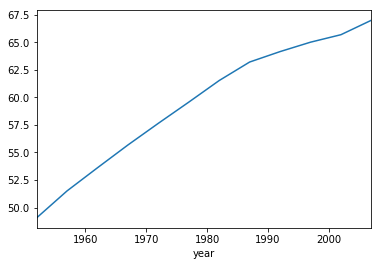

In [238]:
gyle=df.groupby('year')['lifeExp'].mean()
gyle
gyle.plot()

In [240]:
scientists=pd.read_csv("data/scientists.csv")
scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [248]:
ages=scientists['Age']
ages.max()
#나이가 평균보다 큰 나이만 출력
#scientists[ages>ages.mean()]
ages[ages>ages.mean()]

#ages[[True,True,False,False,True,True,False,False]]

0    37
1    61
4    56
5    45
Name: Age, dtype: int64

In [251]:
ages+ages
ages+10

0     47
1     71
2    100
3     76
4     66
5     55
6     51
7     87
Name: Age, dtype: int64

In [252]:
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [253]:
ages.sort_index()

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [254]:
#인덱스 기준 내림차순 정렬
ages.sort_index(ascending=False)

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [255]:
ages.sort_values()#default:오름차순

0    37
6    41
5    45
4    56
1    61
3    66
7    77
2    90
Name: Age, dtype: int64

In [256]:
ages.sort_values(ascending=False)

2    90
7    77
3    66
1    61
4    56
5    45
6    41
0    37
Name: Age, dtype: int64

In [261]:
scientists.dtypes
scientists['Born'].dtype

dtype('O')

In [262]:
scientists.dtypes

Name          object
Born          object
Died          object
Age            int64
Occupation    object
dtype: object

In [265]:
bd=pd.to_datetime(scientists['Born'])
bd

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [266]:
bd=pd.to_datetime(scientists['Born'], format='%Y-%m-%d')
bd

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [277]:
scientists
#파생변수

#scientists['age_days']=

#scientists['Born']-scientists['Died'] 에러
#Born, Died 컬럼을 각각 문자->날짜로
born_dt=pd.to_datetime(scientists['Born'],format="%Y-%m-%d")
died_dt=pd.to_datetime(scientists['Died'],format="%Y-%m-%d")
scientists['born_dt']=born_dt
scientists['died_dt']=died_dt
#scientists['born_dt'],scientists['died_dt']=(born_dt,died_dt)
scientists['age_days']=scientists['died_dt']-scientists['born_dt']
scientists

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days


In [279]:
scientists.columns
scientists.drop(['Age'],axis=1)

,Name,Born,Died,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,28422 days


In [282]:
#정규표현식
import seaborn as sns
anscombe=sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


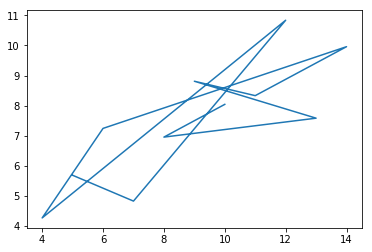

In [287]:
dataset_1=anscombe[anscombe['dataset']=='I']
dataset_2=anscombe[anscombe['dataset']=='II']
dataset_3=anscombe[anscombe['dataset']=='III']
dataset_4=anscombe[anscombe['dataset']=='IV']

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(dataset_1['x'], dataset_1['y'])

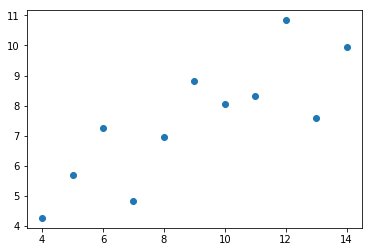

In [286]:
plt.plot(dataset_1['x'], dataset_1['y'],'o')

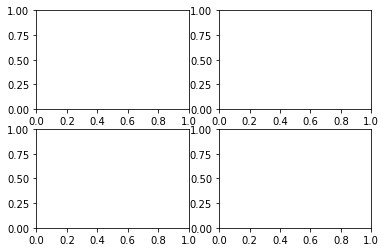

In [289]:
fig=plt.figure()
axes1=fig.add_subplot(2,2,1)
axes2=fig.add_subplot(2,2,2)
axes3=fig.add_subplot(2,2,3)
axes4=fig.add_subplot(2,2,4)

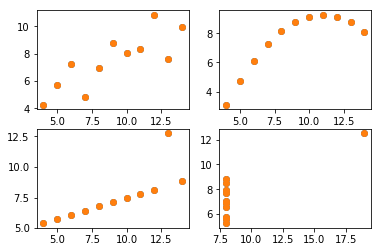

In [291]:
axes1.plot(dataset_1['x'],dataset_1['y'],'o')
axes2.plot(dataset_2['x'],dataset_2['y'],'o')
axes3.plot(dataset_3['x'],dataset_3['y'],'o')
axes4.plot(dataset_4['x'],dataset_4['y'],'o')
fig

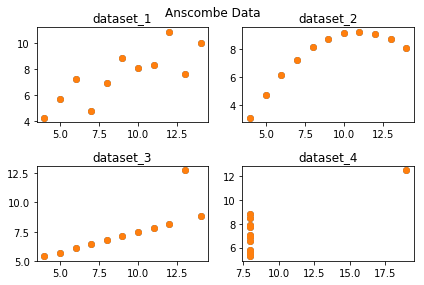

In [295]:
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")
fig.suptitle("Anscombe Data")
fig.tight_layout()
fig